In [1]:
from marketlib.data import onlinedata
import datetime
import pandas as pd
coinex = onlinedata.CoinEx(access_id="19B5BFA0056444769D37DCD7A45BB646", secret_key="5909588B7DF5807D378E1C241B4E39F94247126004691590")
binance = onlinedata.Binance()

In [5]:
# finished_order = pd.DataFrame(coinex.request("get", Futures_HTTP.Orders.GET_FILLED_ORDER, params={"market_type": "FUTURES", "limit":1000})["data"])

In [4]:
user_transaction = pd.DataFrame(coinex.request("get", '/futures/user-deals', params={"market": "ADAUSDT","market_type": "FUTURES", "limit": 1000})["data"])

In [5]:
historical_position = pd.DataFrame(coinex.request("get", "/futures/finished-position", {"market_type": "FUTURES", "limit": 200})['data'])
historical_position[historical_position["side"] == 'short']

,position_id,market,market_type,side,margin_mode,open_interest,close_avbl,ath_position_amount,unrealized_pnl,realized_pnl,...,leverage,margin_avbl,ath_margin_size,position_margin_rate,maintenance_margin_rate,maintenance_margin_value,liq_price,bkr_price,adl_level,finished_type
1,373343948,ADAUSDT,FUTURES,short,cross,0,0,50,0,0.0009195,...,5,0,6.022,0,0.01,0,1.22782821374532673172,1.24010649588277999903,0,limit
2,373343865,ADAUSDT,FUTURES,short,cross,0,0,110,0,-0.1939797000000000008,...,5,0,13.2258,0,0.01,0,1.43031887303455445499,1.44462206176489999954,0,market
3,373343757,ADAUSDT,FUTURES,short,cross,0,0,110,0,-0.0790955000000000008,...,5,0,13.2214,0,0.01,0,1.90820815408966053681,1.92729023563055714217,0,market
4,373343714,ADAUSDT,FUTURES,short,cross,0,0,50,0,-0.01003,...,5,0,6.008,0,0.01,0,2.43404712859681188026,2.45838759988277999907,0,market
5,373343685,ADAUSDT,FUTURES,short,cross,0,0,50,0,0.0009635,...,5,0,6.011,0,0.01,0,1.23450809889384158323,1.24685317988277999907,0,limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,371788904,ADAUSDT,FUTURES,short,cross,0,0,60,0,0.086529,...,5,0,8.2536,0,0.01,0,5.87878690219009900976,5.93757477121199999986,0,market
99,371640910,ADAUSDT,FUTURES,short,cross,0,0,300,0,-0.242625,...,5,0,42.522,0,0.01,0,0.88618663077306930691,0.89504849708079999998,0,market
100,371562544,ADAUSDT,FUTURES,short,cross,0,0,290,0,6.7075500242399999997,...,5,0,42.3868,0,0.01,0,0.93670084427137322426,0.9460678527140869565,0,market_close_all
101,371558072,ADAUSDT,FUTURES,short,cross,0,0,220,0,-0.6079344000000000024,...,5,0,31.90226666,0,0.01,0,1.16578366831683168315,1.17744150499999999998,0,market


In [104]:
historical_position.loc[historical_position["position_id"] == 371558072	].iloc[:,:15]

,position_id,market,market_type,side,margin_mode,open_interest,close_avbl,ath_position_amount,unrealized_pnl,realized_pnl,avg_entry_price,cml_position_value,max_position_value,created_at,updated_at
101,371558072,ADAUSDT,FUTURES,short,cross,0,0,220,0,-0.6079344000000000024,0.7250234159779614325,0,159.511333333333333333,1748546558350,1748546936474


In [105]:
pos = user_transaction.loc[user_transaction["position_id"] == 371558072].copy()

In [108]:
pos

,deal_id,created_at,market,side,order_id,position_id,price,amount,role,fee,fee_ccy
528,1820945352,1748546936474,ADAUSDT,buy,175042823198,371558072,0.7257,69,taker,0.02503665,USDT
529,1820945351,1748546936474,ADAUSDT,buy,175042823198,371558072,0.7257,151,taker,0.05479035,USDT
530,1820944646,1748546912344,ADAUSDT,sell,175042803779,371558072,0.725,120,taker,0.0435,USDT
531,1820944351,1748546897899,ADAUSDT,buy,175042790457,371558072,0.7257,36,taker,0.0130626,USDT
532,1820944350,1748546897898,ADAUSDT,buy,175042790457,371558072,0.7257,84,taker,0.0304794,USDT
533,1820942259,1748546789841,ADAUSDT,sell,175042712712,371558072,0.7254,120,taker,0.043524,USDT
534,1820941828,1748546768173,ADAUSDT,buy,175042688328,371558072,0.7257,80,taker,0.029028,USDT
535,1820938212,1748546628367,ADAUSDT,sell,175042501113,371558072,0.7253,60,maker,0.0130554,USDT
536,1820936354,1748546558350,ADAUSDT,sell,175042498097,371558072,0.7243,120,taker,0.043458,USDT


In [109]:
pos['created_at'] = pd.to_datetime(pos["created_at"], unit='ms')
pos.set_index("created_at", inplace=True)

In [110]:
pos[["amount", "price", "fee"]]= pos[["amount", "price", "fee"]].astype(float)
pos.sort_values("created_at", ascending=True, inplace=True)
fee = pos["fee"].sum()


In [111]:
# pos_grup = pos.groupby("created_at")
# pos_grup
# for order_id, group_df in pos_grup:
#     print(f"Order ID: {order_id}")
#     print(group_df.iloc[:,:2])

In [112]:
sell_ada = pos.loc[pos["side"] == 'sell']
buy_ada = pos.loc[pos["side"] == 'buy']

In [113]:
avg_buy_price = buy_ada["amount"].mul(buy_ada["price"]).sum() / buy_ada["amount"].sum()
avg_sell_price = sell_ada["amount"].mul(sell_ada["price"]).sum() / sell_ada["amount"].sum()

In [114]:
# temp = pos.copy()
# temp.loc[temp['side'] == "buy", "amount"] = temp.loc[temp['side'] == "buy"]["amount"].mul(-1)
# temp["amount"].cumsum()
# buy_ada["amount"].sum()
avg_sell_price


np.float64(0.7249571428571427)

In [115]:
(avg_sell_price + avg_buy_price) / 2

np.float64(0.7253285714285713)

In [116]:
pos

,deal_id,market,side,order_id,position_id,price,amount,role,fee,fee_ccy
created_at,,,,,,,,,,
2025-05-29 19:22:38.350,1820936354,ADAUSDT,sell,175042498097,371558072,0.7243,120.0,taker,0.043458,USDT
2025-05-29 19:23:48.367,1820938212,ADAUSDT,sell,175042501113,371558072,0.7253,60.0,maker,0.013055,USDT
2025-05-29 19:26:08.173,1820941828,ADAUSDT,buy,175042688328,371558072,0.7257,80.0,taker,0.029028,USDT
2025-05-29 19:26:29.841,1820942259,ADAUSDT,sell,175042712712,371558072,0.7254,120.0,taker,0.043524,USDT
2025-05-29 19:28:17.898,1820944350,ADAUSDT,buy,175042790457,371558072,0.7257,84.0,taker,0.030479,USDT
2025-05-29 19:28:17.899,1820944351,ADAUSDT,buy,175042790457,371558072,0.7257,36.0,taker,0.013063,USDT
2025-05-29 19:28:32.344,1820944646,ADAUSDT,sell,175042803779,371558072,0.7250,120.0,taker,0.043500,USDT
2025-05-29 19:28:56.474,1820945352,ADAUSDT,buy,175042823198,371558072,0.7257,69.0,taker,0.025037,USDT
2025-05-29 19:28:56.474,1820945351,ADAUSDT,buy,175042823198,371558072,0.7257,151.0,taker,0.054790,USDT


In [117]:
pos.reset_index(inplace=True)

In [118]:
pos["profit"] = pos["fee"].mul(-1)


avg_entry_price = 0.0
sum_amount = 0.0
for i, order in pos.iterrows():

    if order["side"] == "sell":
        avg_entry_price = ((avg_entry_price * sum_amount) + order["price"] * order["amount"]) / (sum_amount + order["amount"])
        sum_amount += order["amount"]
    elif order["side"] == "buy":
        pos.loc[i,'profit'] += -(order["price"] - avg_entry_price) * order["amount"]
        print(f"{pos.loc[i,'profit']} = {avg_entry_price} - {order["price"]} * {order["amount"]}")
        if (sum_amount - order["amount"]) == 0.0:
            continue
        # avg_entry_price = ((avg_entry_price * sum_amount) - order["price"] * order["amount"]) / (sum_amount - order["amount"])
        sum_amount -= order["amount"]
        
        
      

-0.11436133333333282 = 0.7246333333333334 - 0.7257 * 80.0
-0.08495212727272212 = 0.7250515151515152 - 0.7257 * 84.0
-0.03640805454545234 = 0.7250515151515152 - 0.7257 * 36.0
-0.07172094752066538 = 0.7250234159779614 - 0.7257 * 69.0
-0.15695453732783293 = 0.7250234159779614 - 0.7257 * 151.0


In [119]:
pos["profit"].sum()

np.float64(-0.6079344000000055)

In [120]:

avg_entry_price

0.7250234159779614

In [121]:
pos

,created_at,deal_id,market,side,order_id,position_id,price,amount,role,fee,fee_ccy,profit
0,2025-05-29 19:22:38.350,1820936354,ADAUSDT,sell,175042498097,371558072,0.7243,120.0,taker,0.043458,USDT,-0.043458
1,2025-05-29 19:23:48.367,1820938212,ADAUSDT,sell,175042501113,371558072,0.7253,60.0,maker,0.013055,USDT,-0.013055
2,2025-05-29 19:26:08.173,1820941828,ADAUSDT,buy,175042688328,371558072,0.7257,80.0,taker,0.029028,USDT,-0.114361
3,2025-05-29 19:26:29.841,1820942259,ADAUSDT,sell,175042712712,371558072,0.7254,120.0,taker,0.043524,USDT,-0.043524
4,2025-05-29 19:28:17.898,1820944350,ADAUSDT,buy,175042790457,371558072,0.7257,84.0,taker,0.030479,USDT,-0.084952
5,2025-05-29 19:28:17.899,1820944351,ADAUSDT,buy,175042790457,371558072,0.7257,36.0,taker,0.013063,USDT,-0.036408
6,2025-05-29 19:28:32.344,1820944646,ADAUSDT,sell,175042803779,371558072,0.7250,120.0,taker,0.043500,USDT,-0.043500
7,2025-05-29 19:28:56.474,1820945352,ADAUSDT,buy,175042823198,371558072,0.7257,69.0,taker,0.025037,USDT,-0.071721
8,2025-05-29 19:28:56.474,1820945351,ADAUSDT,buy,175042823198,371558072,0.7257,151.0,taker,0.054790,USDT,-0.156955


In [20]:
buy_ada

,deal_id,market,side,order_id,position_id,price,amount,role,fee,fee_ccy
created_at,,,,,,,,,,
2025-05-29 20:45:50.189,1821035811,ADAUSDT,buy,175045418338,371562544,0.7284,40.0,maker,0.008741,USDT
2025-05-29 22:56:32.112,1821159922,ADAUSDT,buy,175045418339,371562544,0.7274,30.0,maker,0.006547,USDT
2025-05-29 23:17:49.391,1821179110,ADAUSDT,buy,175045418340,371562544,0.7264,20.0,maker,0.004358,USDT
2025-05-29 23:22:39.227,1821184863,ADAUSDT,buy,175045418341,371562544,0.7254,10.0,maker,0.002176,USDT
2025-05-30 08:27:45.557,1821931585,ADAUSDT,buy,175082751963,371562544,0.7022,210.0,taker,0.073731,USDT
2025-05-30 08:27:45.557,1821931584,ADAUSDT,buy,175082751963,371562544,0.7022,10.0,taker,0.003511,USDT
2025-05-30 08:27:45.557,1821931583,ADAUSDT,buy,175082751963,371562544,0.7020,10.0,taker,0.003510,USDT


ValueError: x and y must be the same size

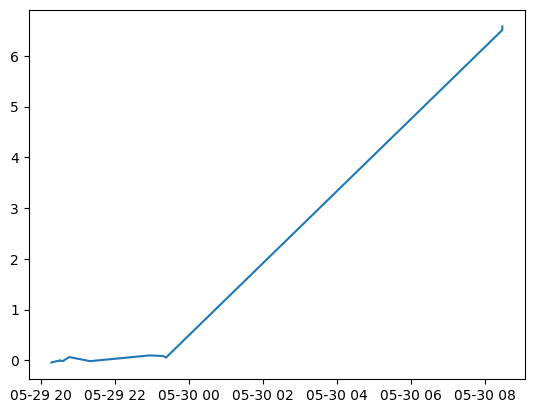

In [21]:
import matplotlib.pyplot as plt


plt.plot(pos["profit"])
plt.scatter(buy_ada.index, pos.loc[buy_ada.index]["profit"], marker="^", color="g")
plt.scatter(sell_ada.index, pos.loc[sell_ada.index]["profit"], marker="v", color="r")
for i, row in pos.iterrows():
    plt.text(i, row["profit"] + 0.01, s=str(row["amount"]))

plt.xticks(rotation=45, ha="right")
plt.axhline(y=0, linestyle="--", color="r", linewidth=0.5)
plt.ylabel("USDT")
plt.xlabel("Date Time")
plt.title("position profit for position_id = 373344240")
plt.tight_layout()
pos

In [ ]:
amount_change = pos[["side", "amount", "price"]].copy()
amount_change.loc[amount_change["side"] == "sell", "amount"] = amount_change.loc[amount_change["side"] == "sell", "amount"].mul(-1)
amount_change["amount_usdt"] = amount_change['amount'].cumsum().mul(amount_change['price'])
amount_change

,side,amount,price,amount_usdt
created_at,,,,
2025-05-29 20:16:54.701,sell,-120.0,0.7294,-87.528
2025-05-29 20:31:16.734,sell,-10.0,0.7304,-94.952
2025-05-29 20:31:18.275,sell,-10.0,0.7304,-102.256
2025-05-29 20:31:18.277,sell,-40.0,0.7304,-131.472
2025-05-29 20:35:44.363,sell,-70.0,0.7314,-182.850
2025-05-29 20:45:50.189,buy,40.0,0.7284,-152.964
2025-05-29 21:19:51.536,sell,-80.0,0.7324,-212.396
2025-05-29 22:56:32.112,buy,30.0,0.7274,-189.124
2025-05-29 23:17:49.391,buy,20.0,0.7264,-174.336


In [ ]:
ada_chart = coinex.get_data("ADAUSDT", '1hour', limit=1000)


In [ ]:
temp = pd.DataFrame()
temp = ada_chart.loc[(ada_chart.index >= pos.index.min()) & (ada_chart.index <= pos.index.max())].copy()
unrealized = pd.concat([pos, temp], axis=0).sort_index()


In [ ]:
import numpy as np
np.isnan(unrealized["low"].iloc[0])

np.True_

In [ ]:

unrealized['pnl'] = float("nan")
unrealized["transfer_to_reailized"] = float('nan')
avg_entry_price = 0.0
sum_amount = 0.0
for i, order in unrealized.iterrows():
    if order["side"] == "buy":
        avg_entry_price = ((avg_entry_price * sum_amount) + order["price"] * order["amount"]) / (sum_amount + order["amount"])
        sum_amount += order["amount"]
    elif order["side"] == "sell":
        if (sum_amount - order["amount"]) == 0.0:
            unrealized.loc[i, "transfer_to_reailized"] = (order["price"] - avg_entry_price) * order["amount"]
            unrealized.loc[i, "pnl"] = (order["price"] - avg_entry_price) * sum_amount
            continue
        avg_entry_price = ((avg_entry_price * sum_amount)- order['price'] * order["amount"]) / (sum_amount - order["amount"])
        sum_amount -= order["amount"]
        unrealized.loc[i, "transfer_to_reailized"] = (order["price"] - avg_entry_price) * order["amount"]
    elif not np.isnan(order["low"]):
        unrealized.loc[i, "pnl"] = (order["low"] - avg_entry_price) * sum_amount
        

In [ ]:
unr_pnl = unrealized["pnl"].dropna().copy()

In [ ]:
nearest_index = ada_chart.index.searchsorted(pos.index, side="right") -1
nearest_index

array([16, 16, 17, 18, 19, 24, 26, 27])

In [ ]:
historical_position.loc[historical_position["position_id"] == pos["position_id"].iloc[0]]["market"].loc[0]
    

'ADAUSDT'

C:\Users\Laptopkaran\AppData\Local\Temp\ipykernel_26224\3064951967.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(labels=ax3.get_xticklabels(), rotation=45, ha="right")
C:\Users\Laptopkaran\AppData\Local\Temp\ipykernel_26224\3064951967.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(labels=ax2.get_xticklabels(), rotation=45, ha="right")
C:\Users\Laptopkaran\AppData\Local\Temp\ipykernel_26224\3064951967.py:87: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()
C:\Users\Laptopkaran\AppData\Local\Temp\ipykernel_26224\3064951967.py:88: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


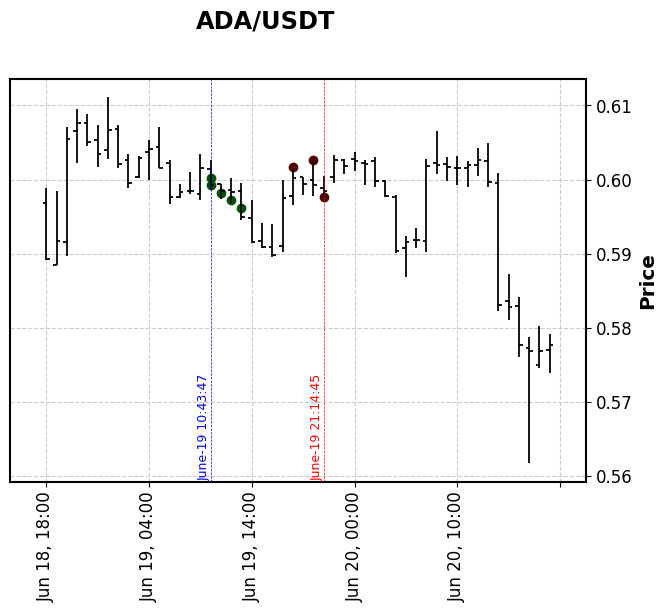

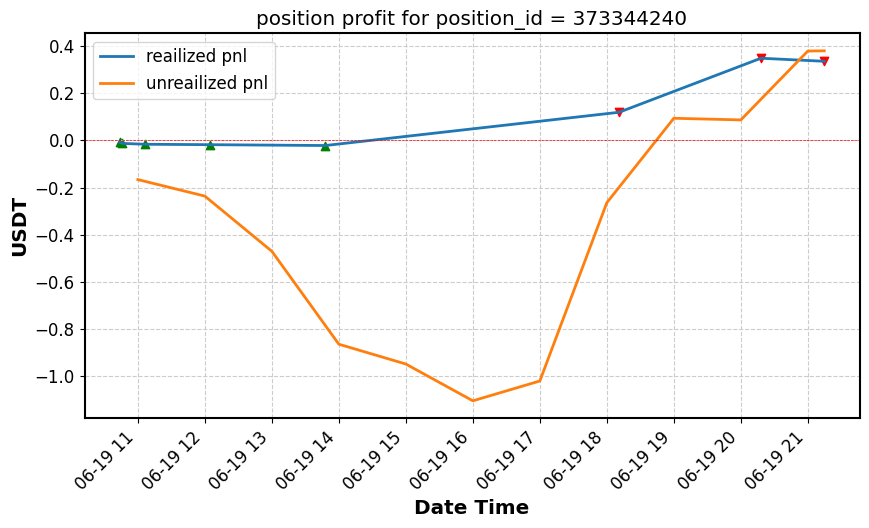

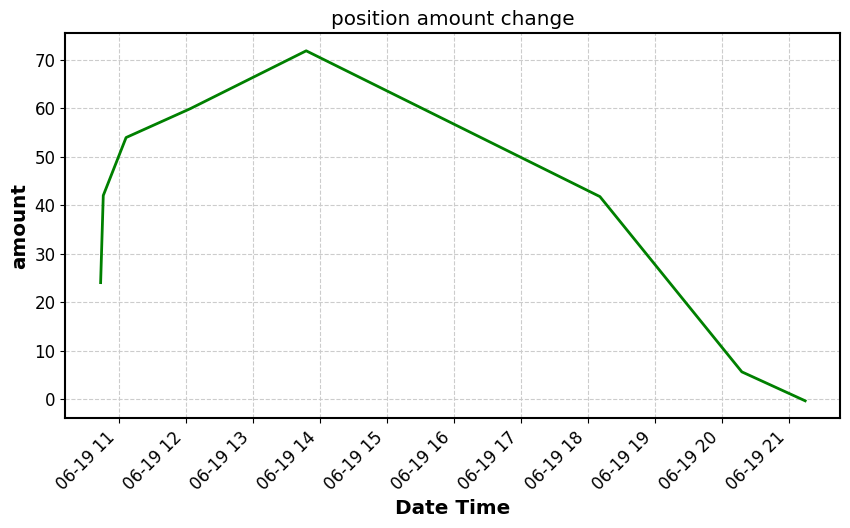

In [ ]:
import mplfinance as mpf

fig, ax = mpf.plot(
    ada_chart[:50],
    type="ohlc",
    style="classic",
    returnfig=True,
    xrotation=90,
    title="ADA/USDT"
,
)
main_ax = ax[0]

main_ax.scatter(
    x=ada_chart.index.searchsorted(buy_ada.index, side="right") - 1,
    y=buy_ada["price"],
    marker="o",
    color="#050",
)
main_ax.scatter(
    x=ada_chart.index.searchsorted(sell_ada.index, side="right") - 1,
    y=sell_ada["price"],
    marker="o",
    color="#500",
)


main_ax.axvline(
    x=ada_chart.index.searchsorted(pos.index[0], side="right") - 1,
    color="blue",
    linestyle="--",
    linewidth=0.5,
)
main_ax.axvline(
    x=ada_chart.index.searchsorted(pos.index[len(pos) - 1], side="right") - 1,
    color="red",
    linestyle="--",
    linewidth=0.5,
)

main_ax.text(
    nearest_index.min(),
    main_ax.get_ylim()[0] + main_ax.get_ylim()[0] * 0.001,
    str(pos.index[0].strftime("%B-%d %H:%M:%S")),
    fontsize=9,
    color="blue",
    rotation=90,
    ha="right",
)
main_ax.text(
    nearest_index.max(),
    main_ax.get_ylim()[0]+ main_ax.get_ylim()[0] * 0.001,
    str(sell_ada.index[-1].strftime("%B-%d %H:%M:%S")),
    fontsize=9,
    color="red",
    rotation=90,
    ha="right",
)


fig2 , ax2 = plt.subplots(figsize=(10, 5))

fig3, ax3 = plt.subplots(figsize=(10, 5))

ax3.plot(amount_change["amount"].cumsum(), color='g')
ax3.set_xticklabels(labels=ax3.get_xticklabels(), rotation=45, ha="right")
ax3.set_ylabel("amount")
ax3.set_xlabel("Date Time")
ax3.set_title("position amount change")




ax2.plot(pos["profit"], label="reailized pnl")
ax2.plot(unr_pnl, label="unreailized pnl")
ax2.scatter(buy_ada.index, pos.loc[buy_ada.index]["profit"], marker="^", color="g")
ax2.scatter(sell_ada.index, pos.loc[sell_ada.index]["profit"], marker="v", color="r")

ax2.set_xticklabels(labels=ax2.get_xticklabels(), rotation=45, ha="right")
ax2.axhline(y=0, linestyle="--", color="r", linewidth=0.5)
ax2.set_ylabel("USDT")
ax2.set_xlabel("Date Time")
ax2.set_title("position profit for position_id = 373344240")
ax2.legend()


fig2.show()
fig.show()

In [ ]:
amount_change["amount"].cumsum()

created_at
2025-06-19 10:43:47.406    24.008
2025-06-19 10:46:09.246    41.984
2025-06-19 11:06:35.222    53.948
2025-06-19 12:04:14.141    59.920
2025-06-19 13:47:53.288    71.844
2025-06-19 18:10:56.353    41.759
2025-06-19 20:18:01.347     5.597
2025-06-19 21:14:45.429    -0.380
Name: amount, dtype: float64

In [ ]:
from marketlib import Chart
d = pos["price"].to_dict()
price_orders = [tuple([k, v]) for k, v in d.items()]

In [ ]:
chart = Chart()
chart.add_chart(ada_chart[:100], "ADAUSDT", "1h")
# chart.add_line(ada_chart.index[nearest_index].values, type="tline")
chart.add_plot(profits, type='scatter', marker='v')
chart.plot()


NameError: name 'profits' is not defined

In [ ]:
balance = coinex.request('get', "/assets/spot/balance")["data"][0]["available"]

GET/v2/assets/spot/balance1753771038002


In [ ]:
round(historical_position.iloc[:,9].astype(float).sum() + 100, 20), float(balance)

(np.float64(92.947798494139), 92.94779849)

In [ ]:
df = pd.DataFrame(coinex.request("get", "/futures/user-deals", params={"market": "ADAUSDT" ,"market_type": "FUTURES", 'limit':100})['data'])

In [ ]:
df['created_at']= pd.to_datetime(df["created_at"], unit='ms')

In [ ]:
df

,deal_id,created_at,market,side,order_id,position_id,price,amount,role,fee,fee_ccy
0,1853641523,2025-06-19 21:14:45.429,ADAUSDT,sell,176302456782,373344240,0.5977,10,taker,0.0029885,USDT
1,1853597435,2025-06-19 20:18:01.347,ADAUSDT,sell,176282398219,373344240,0.6027,60,maker,0.0108486,USDT
2,1853489926,2025-06-19 18:10:56.353,ADAUSDT,sell,176282538155,373344240,0.6017,50,maker,0.0090255,USDT
3,1853234568,2025-06-19 13:47:53.288,ADAUSDT,buy,176282544354,373344240,0.5962,20,maker,0.0035772,USDT
4,1853146295,2025-06-19 12:04:14.141,ADAUSDT,buy,176282398111,373344240,0.5972,10,maker,0.0017916,USDT
...,...,...,...,...,...,...,...,...,...,...,...
95,1841336677,2025-06-11 12:08:15.541,ADAUSDT,buy,175808247400,372760884,0.7168,190,taker,0.068096,USDT
96,1841333002,2025-06-11 12:06:08.593,ADAUSDT,sell,175807659427,372760884,0.7164,70,maker,0.0150444,USDT
97,1841326295,2025-06-11 12:03:16.028,ADAUSDT,sell,175807811297,372760884,0.7134,110,taker,0.039237,USDT
98,1841326280,2025-06-11 12:03:15.507,ADAUSDT,buy,175807810714,372760884,0.7135,50,taker,0.0178375,USDT


In [ ]:
btc = coinex.get_data("BTCUSDT")
btc

,open,close,high,low,volume,value
datetime,,,,,,
2025-07-24 05:00:00,117958.56,117616.44,117958.56,117520.00,16.403502,1.930798e+06
2025-07-24 06:00:00,117616.44,117470.40,117830.00,117420.00,18.612675,2.188575e+06
2025-07-24 07:00:00,117459.71,118392.77,118422.46,117123.66,23.655057,2.788277e+06
2025-07-24 08:00:00,118386.01,118743.73,118799.64,118212.93,23.707821,2.811853e+06
2025-07-24 09:00:00,118743.72,118438.14,118751.06,118267.57,27.260983,3.230003e+06
...,...,...,...,...,...,...
2025-07-28 04:00:00,119255.48,119183.99,119352.69,119117.70,12.887898,1.536468e+06
2025-07-28 05:00:00,119183.99,119514.17,119715.59,119126.36,25.394982,3.031613e+06
2025-07-28 06:00:00,119514.17,119433.38,119559.74,119344.00,16.508033,1.972204e+06


In [ ]:
coinex.get_spot_balance()

GET/v2/assets/spot/balance1753692673764


KeyError: 'available'

In [ ]:
r = client.market_status("BTCUSDT")
r.json()

GET/v2/futures/market1753692498320


{'code': 0,
 'data': [{'base_ccy': 'BTC',
   'base_ccy_precision': 4,
   'contract_type': 'linear',
   'is_copy_trading_available': True,
   'is_market_available': True,
   'leverage': ['1', '2', '3', '5', '8', '10', '15', '20', '30', '50', '100'],
   'maker_fee_rate': '0.0003',
   'market': 'BTCUSDT',
   'min_amount': '0.0001',
   'open_interest_volume': '1151.5945',
   'quote_ccy': 'USDT',
   'quote_ccy_precision': 2,
   'status': 'online',
   'taker_fee_rate': '0.0005',
   'tick_size': '0.01'}],
 'message': 'OK'}

In [ ]:
r = client.request("GET", client.API_URL+"/assets/spot/balance")

GET/v2/assets/spot/balance1753692533005


In [ ]:
r.json()

{'code': 0, 'data': None, 'message': 'OK'}

In [ ]:
from urllib.parse import urlparse, urlencode


'type=x&limit=50'

### --------------------------------

In [ ]:
btc = btc[["open", "high", "low", "close", "volume"]]

In [ ]:
btc.index.name = "datetime"

In [ ]:
btc

,open,high,low,close,volume
datetime,,,,,
2025-07-24 03:00:00,118902.47,119314.95,118500.00,118500.02,18.000022
2025-07-24 04:00:00,118500.02,118595.51,117821.76,117958.56,10.498950
2025-07-24 05:00:00,117958.56,117958.56,117520.00,117616.44,16.403502
2025-07-24 06:00:00,117616.44,117830.00,117420.00,117470.40,18.612675
2025-07-24 07:00:00,117459.71,118422.46,117123.66,118392.77,23.655057
...,...,...,...,...,...
2025-07-28 02:00:00,119011.76,119764.00,119011.75,119403.54,9.064217
2025-07-28 03:00:00,119403.54,119464.63,119222.44,119255.49,7.133384
2025-07-28 04:00:00,119255.48,119352.69,119117.70,119183.99,12.887898


In [ ]:
binance.symbol_info("BTCUSDT")

{'symbol': 'BTCUSDT',
 'status': 'TRADING',
 'baseAsset': 'BTC',
 'baseAssetPrecision': 8,
 'quoteAsset': 'USDT',
 'quotePrecision': 8,
 'quoteAssetPrecision': 8,
 'baseCommissionPrecision': 8,
 'quoteCommissionPrecision': 8,
 'orderTypes': ['LIMIT',
  'LIMIT_MAKER',
  'MARKET',
  'STOP_LOSS',
  'STOP_LOSS_LIMIT',
  'TAKE_PROFIT',
  'TAKE_PROFIT_LIMIT'],
 'icebergAllowed': True,
 'ocoAllowed': True,
 'otoAllowed': True,
 'quoteOrderQtyMarketAllowed': True,
 'allowTrailingStop': True,
 'cancelReplaceAllowed': True,
 'amendAllowed': True,
 'isSpotTradingAllowed': True,
 'isMarginTradingAllowed': True,
 'filters': [{'filterType': 'PRICE_FILTER',
   'minPrice': '0.01000000',
   'maxPrice': '1000000.00000000',
   'tickSize': '0.01000000'},
  {'filterType': 'LOT_SIZE',
   'minQty': '0.00001000',
   'maxQty': '9000.00000000',
   'stepSize': '0.00001000'},
  {'filterType': 'ICEBERG_PARTS', 'limit': 10},
  {'filterType': 'MARKET_LOT_SIZE',
   'minQty': '0.00000000',
   'maxQty': '101.91675658',

In [ ]:
binance.get_current_price("BTCUSDT")

{'symbol': 'BTCUSDT', 'price': '118270.54000000'}

In [ ]:
binance.get_data("BTCUSDT", "5m",start_time=datetime.datetime(2024,12,1,12),end_time=datetime.datetime(2024,12,1,13))

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
open_time,,,,,,,,,,,
2024-12-01 12:00:00,97108.89,97130.56,97066.86,97099.99,90.26327,1733054699999,8.765011e+06,12646,23.08753,2.241896e+06,0
2024-12-01 12:05:00,97099.98,97099.99,97068.34,97068.35,56.68418,1733054999999,5.503459e+06,4205,8.70963,8.456362e+05,0
2024-12-01 12:10:00,97068.34,97099.13,97039.42,97074.98,45.91740,1733055299999,4.457032e+06,10039,19.37139,1.880294e+06,0
2024-12-01 12:15:00,97074.98,97076.31,96956.00,96970.65,40.39822,1733055599999,3.919978e+06,10340,12.13587,1.177604e+06,0
2024-12-01 12:20:00,96970.64,96996.56,96902.16,96960.80,71.16595,1733055899999,6.899870e+06,17552,37.56283,3.641907e+06,0
2024-12-01 12:25:00,96960.80,96990.99,96951.10,96951.11,80.78565,1733056199999,7.834740e+06,6265,31.39079,3.044242e+06,0
2024-12-01 12:30:00,96951.10,96951.11,96862.80,96932.00,47.94762,1733056499999,4.646508e+06,15645,20.69327,2.005294e+06,0
2024-12-01 12:35:00,96932.00,96967.20,96929.85,96958.04,28.98279,1733056799999,2.809932e+06,11384,18.69338,1.812382e+06,0
2024-12-01 12:40:00,96958.05,96976.46,96910.11,96932.97,22.26205,1733057099999,2.158084e+06,10727,10.41699,1.009797e+06,0


In [ ]:
s = """
Add AMM Account Liquidity=
Reduce AMM Account Liquidity=
Get AMM Liquidity Pool=
Get AMM Income History=
"""

s= s.upper().replace(" ", "_")
print(s)


ADD_AMM_ACCOUNT_LIQUIDITY=
REDUCE_AMM_ACCOUNT_LIQUIDITY=
GET_AMM_LIQUIDITY_POOL=
GET_AMM_INCOME_HISTORY=



In [ ]:
from marketlib.data.onlinedata import Futures_HTTP


In [ ]:
print(Futures_HTTP())

Futures_HTTP

Ticker:
GET_MARKET_STATUS: /futures/market
GET_MARKET_INFORMATION: /futures/ticker
GET_MARKET_DEPTH: /futures/depth
GET_MARKET_TRANSACTIONS: /futures/deals
GET_MARKET_CANDLESTICK: /futures/kline
GET_MARKET_FUNDING_RATE: /futures/funding-rate
GET_MARKET_FUNDING_RATE_HISTORY: /futures/funding-rate-history
GET_MARKET_PREMIUM_INDEX_HISTORY: /futures/premium-index-history
GET_MARKET_POSITION_LEVEL: /futures/position-level
GET_MARKET_LIQUIDATION_HISTORY: /futures/liquidation-history
GET_MARKET_BASIS_RATE_HISTORY: /futures/basis-rate-history
GET_MARKET_INDEX: /futures/index
----------------
Orders:
PLACE_ORDER: /futures/order
PLACE_STOP_ORDER: /futures/stop-order
BATCH_PLACE_ORDERS: /futures/batch-order
BATCH_PLACE_STOP_ORDERS: /futures/batch-stop-order
ORDER_STATUS_QUERY: /futures/order-status
BATCH_QUERY_ORDER_STATUS: /futures/batch-order-status
GET_FILLED_ORDER: /futures/finished-order
GET_UNFILLED_STOP_ORDER: /futures/pending-stop-order
GET_FILLED_STOP_ORDER: /futures/finish